In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = '2010-01-01'
end = '2019-12-31'

import yfinance as yf

df = yf.download('AAPL', start=start, end=end)
print(df.head())


ModuleNotFoundError: No module named 'numpy'

In [6]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [7]:
df = df.drop(['Adj Close'], axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,447610800


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

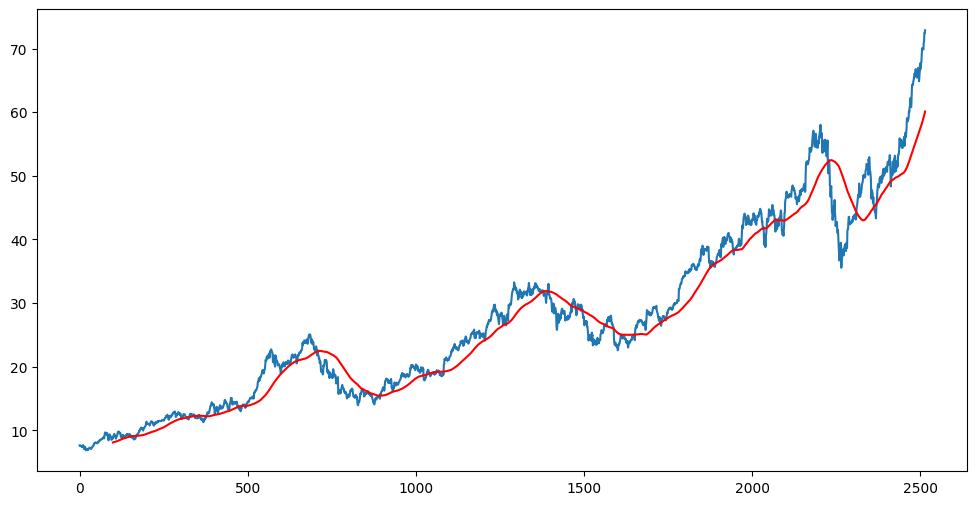

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()
#

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

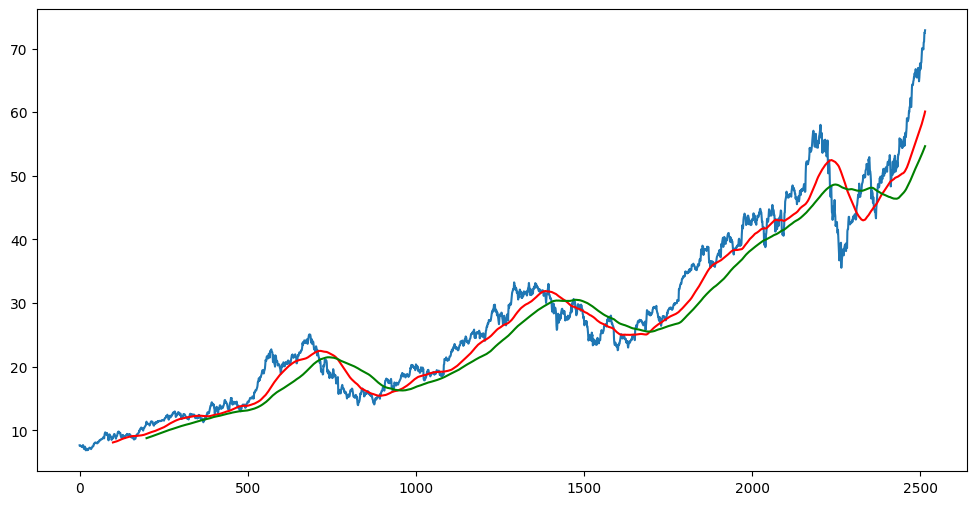

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [12]:
df.shape

(2515, 6)

In [13]:
# splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML Model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 34s 492ms/step - loss: 0.0706
Epoch 2/50
52/52 [==============================] - 26s 498ms/step - loss: 0.0149
Epoch 3/50
52/52 [==============================] - 27s 521ms/step - loss: 0.0104
Epoch 4/50
52/52 [==============================] - 25s 489ms/step - loss: 0.0099
Epoch 5/50
52/52 [==============================] - 25s 488ms/step - loss: 0.0101
Epoch 6/50
52/52 [==============================] - 26s 500ms/step - loss: 0.0089
Epoch 7/50
52/52 [==============================] - 26s 499ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 26s 498ms/step - loss: 0.0081
Epoch 9/50
52/52 [==============================] - 26s 501ms/step - loss: 0.0083
Epoch 10/50
52/52 [==============================] - 26s 499ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 26s 501ms/step - loss: 0.0075
Epoch 12/50
52/52 [==============================] - 25s 490ms/step - loss: 0.0071
Epoch 13/50
5

In [24]:
# model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [26]:
past_100_days = data_training.tail(100)

In [28]:
# final_df = past_100_days.append(data_testing, ignore_index=True)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [30]:
final_df.shape

(855, 1)

In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [32]:
input_data.shape

(855, 1)

In [33]:
x_test = []
y_test = []

In [34]:
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100:i])
    y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [36]:
# Making Prediction

In [37]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 58ms/step


In [38]:
y_predicted.shape

(755, 1)

In [39]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [40]:
y_predicted

array([[0.13521418],
       [0.13623615],
       [0.13717704],
       [0.13800436],
       [0.13869566],
       [0.13924113],
       [0.13965254],
       [0.13996302],
       [0.1402145 ],
       [0.14045046],
       [0.14070626],
       [0.14100249],
       [0.14135484],
       [0.14177413],
       [0.14225987],
       [0.14280368],
       [0.1433931 ],
       [0.14401127],
       [0.14465337],
       [0.14532371],
       [0.14602232],
       [0.14674333],
       [0.1474748 ],
       [0.14825305],
       [0.14914975],
       [0.15023012],
       [0.15155306],
       [0.15316798],
       [0.15510598],
       [0.15737455],
       [0.15985744],
       [0.16252974],
       [0.16538337],
       [0.16840552],
       [0.17157185],
       [0.17484899],
       [0.1782047 ],
       [0.18160827],
       [0.18502107],
       [0.18840067],
       [0.1917069 ],
       [0.19490299],
       [0.19798511],
       [0.20095627],
       [0.20382623],
       [0.20659979],
       [0.2092762 ],
       [0.211

In [41]:
scaler.scale_

array([0.02123255])

In [42]:
scaler_factor = 1 / 0.02123255
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

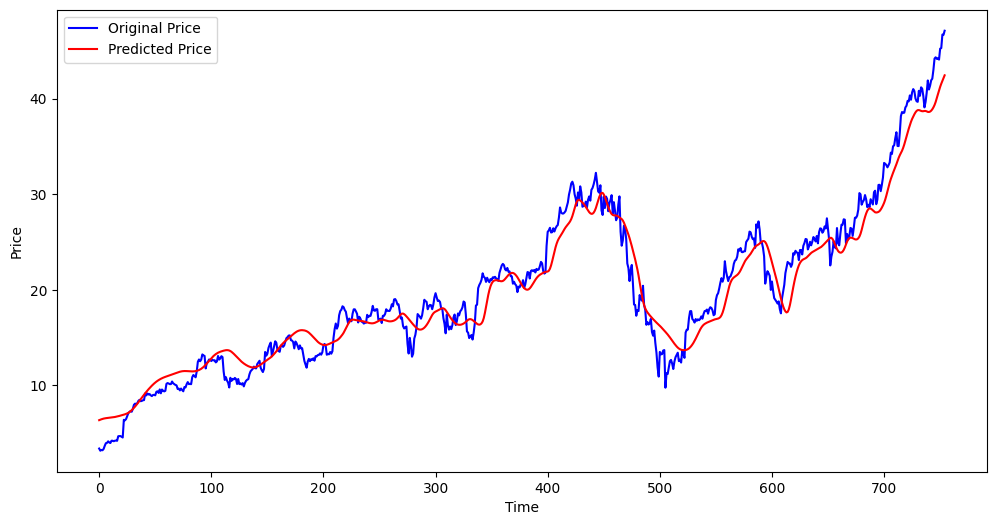

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()